#  `LEAD SCORING CASE STUDY`

### THE STEPS WE FOLLOW IN THIS EXERCISE ARE AS FOLLOWS:
1.  `READING & UNDERSTANDING THE DATA.`
2.  `HANDLING MISSING VALUES.`
3.  `TREATING OUTLIERS & IMBALANCE DATA.`
4.  `VISUALISING THE DATA.`
5.  `DATA PREPRATION(mapping & dummy variables).`
6.  `SPLITTING INTO TRAIN-TEST SET(dividing into X & y).`
7.  `RESCALING.`
8.  `BUILDING A LINEAR MODEL (using RFE & statsmodel & checking VIF also).`
9.  `PLOTTING ROC CURVE.`
10. `FINDING OPTIMAL CUTOFF POINT.`
11. `PRECISION & RECALL (precision_recall_curve).`
12. `PREDICTION & EVALUATION ON TEST-SET.`

## *IMPORTING NECESSARY LIBRARIES*:
- **I AM IMPORTING ALL THE LIBRARIES THAT WE HAVE USED IN THIS ASSIGNMENT HERE ONLY.**

In [1]:
# IMPORTING NECESSARY LIBRARIES REQUIRED FOR THE ANALYSIS

import numpy as np               # ALGEBRIC MODULE
import pandas as pd              # DATAFRAME MODULE 
import matplotlib.pyplot as plt  # VISUALISATION MODULE
import seaborn as sns            # VISUALISATION MODULE

from sklearn.model_selection import train_test_split          # FOR TRAIN-TEST SPLIT OF DATA
from sklearn.preprocessing import StandardScaler              # STANDARDISATION ((mu)mean-0, (s.d)sigma-1)
from sklearn.linear_model import LogisticRegression           # FOR PERFORMING LOGISTIC REGRESSION TASK
from sklearn.feature_selection import RFE                     # FOR CALCULATING RFE(recursive feature elimination)
from sklearn import metrics                                   # FOR USING ACCURACY_SCORE & CONFUSION MATRIX
from sklearn.metrics import precision_score, recall_score     # FOR CALCULATING PRECISION & RECALL SCORE
from sklearn.metrics import precision_recall_curve            # FOR MAKING PRECISION_RECALL CURVE TO STUDY THE OUTPUT

import statsmodels.api as sm     # STATISTICAL MODULE(for adding constant and detailed summary of model)
from statsmodels.stats.outliers_influence import variance_inflation_factor #FOR CALCULATING VIF(multicollinearity b/w variables)

In [2]:
# IMPORTING WARNINGS SO THAT WARNINGS WILL NOT COME AS AN OUTPUT FOR OUR VISUALS AND MAKE IT LOOK BAD

import warnings
warnings.filterwarnings("ignore")

In [3]:
# I'AM SETTING AN OPTION TO DISPLAY MAX ROWS AND COLUMNS.

pd.set_option('display.max_columns', 1000)  # THIS WILL DISPLAY MAXIMUM 1000 COLUMNS
pd.set_option('display.max_rows', 1000)     # THIS WILL DISPLAY MAXIMUM 1000 ROWS

# STEP-1 : `READING & UNDERSTANDING THE DATA`

In [4]:
# READING THE DATA-SET
lead_score = pd.read_csv("Leads.csv")
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# LOKKING AT THE ROWS & COLUMNS OF DATA-SET

lead_score.shape

(9240, 37)

In [6]:
# GETTING INFO OF DATA-SET

lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# STASTICAL CALCULATION OF DATA-SET

lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# STEP-2 : `HANDLING MISSING VALUES`

In [8]:
# CONVERTING 'SELECT' TO NP.NAN

lead_score = lead_score.replace('Select', np.nan)
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# CHECKING FOR NULL VALUES

lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# CHECKING NULL VALUES IN PERCENTAGE TERMS AND SORTING IN DESCENDING ORDER

null_values = round((lead_score.isnull().sum()/len(lead_score))*100, 2).sort_values(ascending=False)
null_values

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

### `CROSS-CHECKING THE HIGH (above 40%) NULL VALUES COLUMNS WHEATHER THEY WILL PROVIDE ANY HELP TO OUR MODEL.`

In [11]:
# LOOKING AT ALL THE UNIQUE VALUES PRESENT IN IT

lead_score['How did you hear about X Education'].unique()

array([nan, 'Word Of Mouth', 'Other', 'Online Search', 'Multiple Sources',
       'Advertisements', 'Student of SomeSchool', 'Email', 'Social Media',
       'SMS'], dtype=object)

In [12]:
# LOOKING FOR DISTRIBUTION OF VALUES

lead_score['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [13]:
# CHECKING FOR NULL VALUES

lead_score['How did you hear about X Education'].isnull().sum()

7250

- **SINCE NULL VALUES ARE WAY MUCH MORE THEN THE UNIQUE VALUES SO WE ARE DEFINETLEY DROPPING THE `How did you hear about X Education`.**

In [14]:
# LOOKING AT ALL THE UNIQUE VALUES PRESENT IN IT

lead_score['Lead Profile'].unique()

array([nan, 'Potential Lead', 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [15]:
# LOOKING FOR DISTRIBUTION OF VALUES

lead_score['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [16]:
# CHECKING FOR NULL VALUES

lead_score['Lead Profile'].isnull().sum()

6855

- **SINCE NULL VALUES ARE WAY MUCH MORE THEN THE UNIQUE VALUES SO WE ARE DEFINETLEY DROPPING THE `LEAD PROFILE`.**

In [17]:
# LOOKING AT ALL THE UNIQUE VALUES PRESENT IN IT

lead_score['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [18]:
# LOOKING FOR DISTRIBUTION OF VALUES

lead_score['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [19]:
# CHECKING FOR NULL VALUES

lead_score['Lead Quality'].isnull().sum()

4767

- **SINCE NULL VALUES ARE WAY MUCH MORE THEN THE UNIQUE VALUES SO WE ARE DEFINETLEY DROPPING THE `LEAD QUALITY`.**

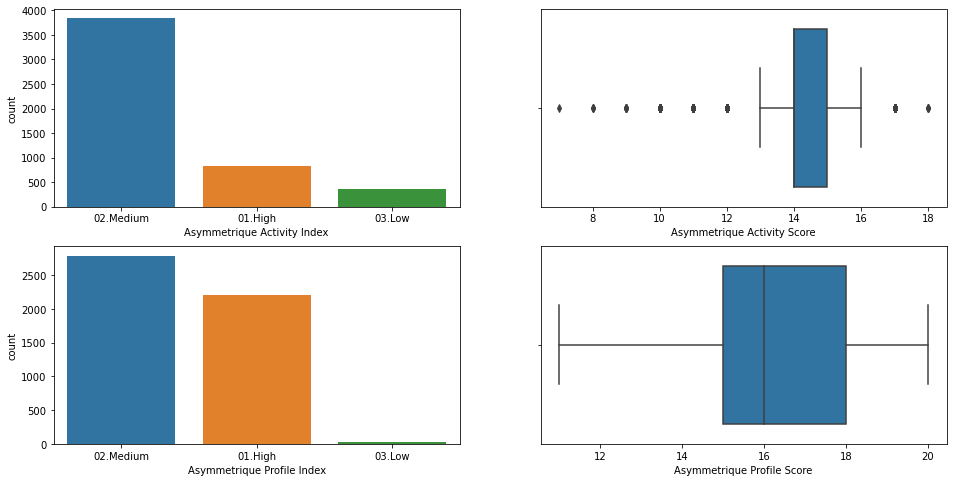

In [20]:
# MAKING A PLOT OF THESE VARIABLES 
# COUNTPLOT FOR CATEGORICAL VARIABLES & BOXPLOT FOR NUMERICAL VARIABLES

plt.figure(figsize=[16,8])

plt.subplot(2,2,1)
sns.countplot(lead_score['Asymmetrique Activity Index'])

plt.subplot(2,2,2)
sns.boxplot(lead_score['Asymmetrique Activity Score'])

plt.subplot(2,2,3)
sns.countplot(lead_score['Asymmetrique Profile Index'])

plt.subplot(2,2,4)
sns.boxplot(lead_score['Asymmetrique Profile Score'])

plt.show()

- **THERE IS TOO MUCH VARIATION's IN THIS VALUES SO IT's NOT RELIABLE TO IMPUTE ANY VALUE TO IT, SO WE WILL DROP THESE COLUMNS.**

### SO WE CAN SEE THAT ALL THE HIGH (above 40%) NULL VALUES COLUMNS ARE NOT PROVIDING MUCH INFORMATION TO OUR MODEL SO WE WILL DROP ALL NULL VALUES ABOVE 40%.

In [21]:
# LIST OF COLUMNS HAVING NULL VALUES MORE THAN 40%

higher_null_values = null_values[null_values.values >= 40.00].index.tolist()
print(len(higher_null_values), "\n")
print(higher_null_values)

7 

['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index']


In [22]:
# DROPPING THOSE COLUMNS WHICH ARE HAVING NULL VALUES HIGHER THAN 40% AS IT WILL HAMPER OUR CASE-STUDY IN FUTURE

lead_score.drop(higher_null_values, axis=1, inplace=True)

In [23]:
# DETERMINING THE ROWS & COLUMNS

lead_score.shape

(9240, 30)

In [24]:
# LOOKING AT REMAINING NULL VALUES IN PERCENTAGE 

round((lead_score.isnull().sum()/len(lead_score))*100, 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [25]:
# LOOKING AT ALL THE UNIQUE VALUES PRESENT IN IT

lead_score['City'].unique()

array([nan, 'Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [26]:
# LOOKING FOR DISTRIBUTION OF VALUES

lead_score['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

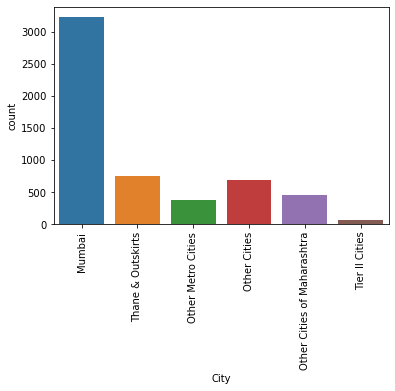

In [27]:
# LOOKING FOR DISTRIBUTION OF VALUES THROUGH VISUALISATION

sns.countplot(lead_score['City'])
plt.xticks(rotation=90)
plt.show()

In [28]:
# REPLACING ALL THE 'NAN' VALUES WITH 'HIGHEST OCCURENCE VARIABLE'

lead_score['City'] = lead_score['City'].replace(np.nan, 'Mumbai')

In [29]:
# LOOKING AT ALL THE UNIQUE VALUES PRESENT IN IT

lead_score['Specialization'].unique()

array([nan, 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [30]:
# LOOKING FOR DISTRIBUTION OF VALUES

lead_score['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

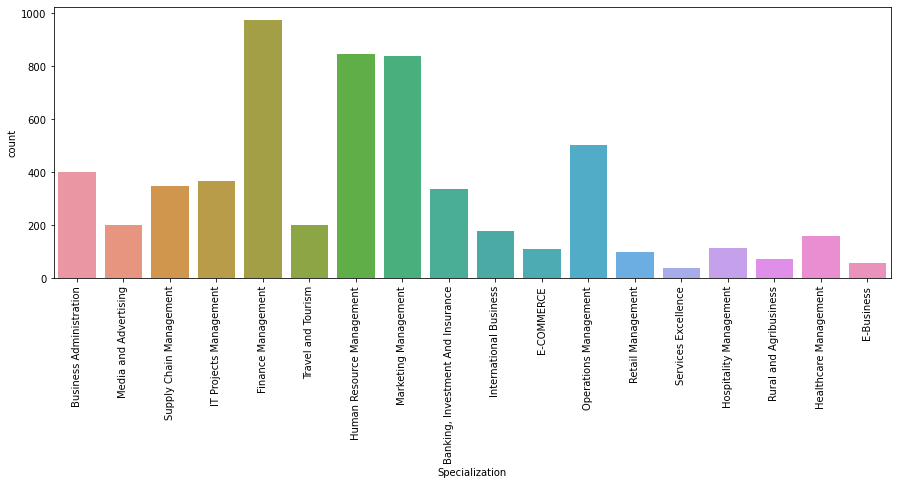

In [31]:
# LOOKING FOR DISTRIBUTION OF VALUES THROUGH VISUALISATION

plt.figure(figsize=[15,5])
sns.countplot(lead_score['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [32]:
# REPLACING ALL THE 'NAN' VALUES WITH 'OTHERS' AS SOME OF THEM MAY NOT HAVE MENTIONED SPECIALISATION OR MAYBE THEY ARE STUDENTS
# AND DON't HAVE A SPECIALISATION YET.

lead_score['Specialization'] = lead_score['Specialization'].replace(np.nan, 'Others')

In [33]:
# LOOKING AT ALL THE UNIQUE VALUES PRESENT IN IT

lead_score['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [34]:
# LOOKING FOR DISTRIBUTION OF VALUES

lead_score['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [35]:
# LOOKING FOR DISTRIBUTION OF VALUES IN PERCENTAGE

lead_score['Tags'].value_counts(normalize=True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

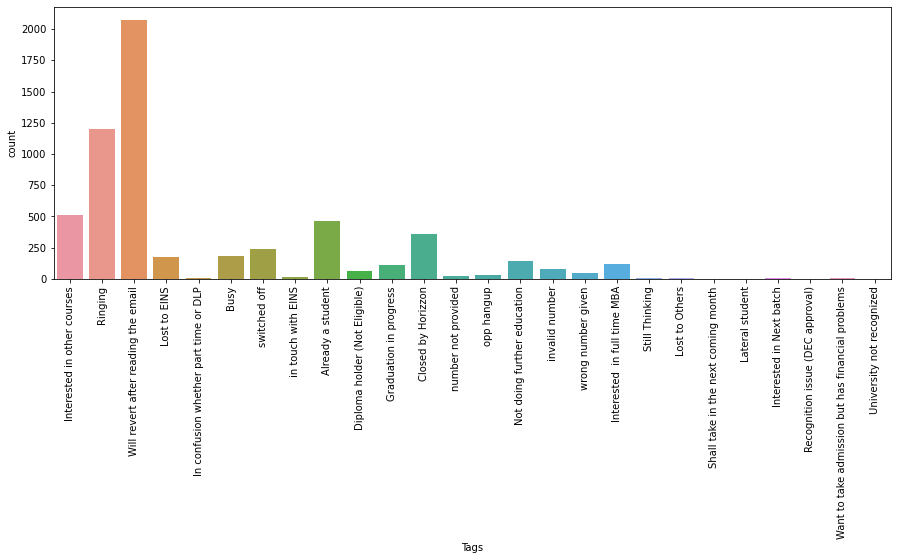

In [36]:
# LOOKING FOR DISTRIBUTION OF VALUES THROUGH VISUALISATION

plt.figure(figsize=[15,5])
sns.countplot(lead_score['Tags'])
plt.xticks(rotation=90)
plt.show()

In [37]:
# REPLACING ALL THE 'NAN' VALUES WITH 'HIGHEST OCCURENCE VARIABLE'

lead_score['Tags'] = lead_score['Tags'].replace(np.nan, 'Will revert after reading the email')


# REPLACING ALL THE 'COLUMNS HAVING VALUES LESS THAN 50' TO A SINGLE COLUMN NAMED 'OTHER TAGS' SO VISUALISATION WILL LOOKS GOOD

lead_score['Tags'] = lead_score['Tags'].replace([  'in touch with EINS','Lost to Others','Still Thinking',
                                                 'Want to take admission but has financial problems',
                                                 'In confusion whether part time or DLP','Interested in Next batch',
                                                 'Lateral student','Shall take in the next coming month',
                                                 'University not recognized','Recognition issue (DEC approval)',
                                                 'wrong number given','opp hangup','number not provided'  ] ,
                                                'Other Tags')

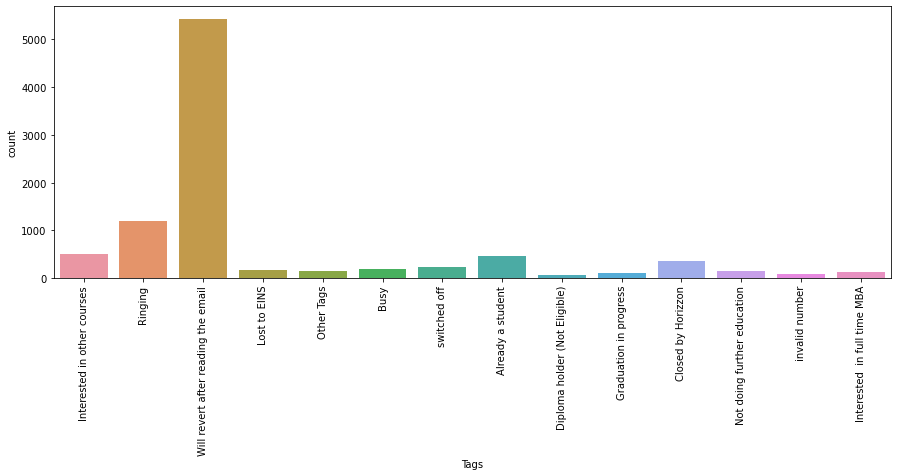

In [38]:
# AGAIN LOOKING FOR DISTRIBUTION THROUGH VISUALISATION AFTER REPLACING SOME VARIABLES

plt.figure(figsize=[15,5])
sns.countplot(lead_score['Tags'])
plt.xticks(rotation=90)
plt.show()

In [39]:
# LOOKING AT ALL THE UNIQUE VALUES PRESENT IN IT

lead_score['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [40]:
# LOOKING FOR DISTRIBUTION OF VALUES

lead_score['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

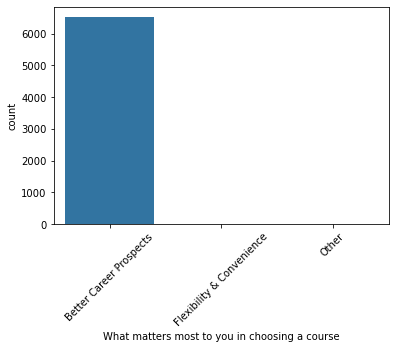

In [41]:
# LOOKING FOR DISTRIBUTION OF VALUES THROUGH VISUALISATION

sns.countplot(lead_score['What matters most to you in choosing a course'])
plt.xticks(rotation=45)
plt.show()

**WE WILL DROP THESE TYPES OF COLUMNS AS IT SHOWS IMBALANCE DATA AND IT WILL HAMPER OUR MODEL.**

In [42]:
# DROPPING THIS COLUMN

lead_score.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [43]:
# LOOKING AT ALL THE UNIQUE VALUES PRESENT IN IT

lead_score['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [44]:
# LOOKING FOR DISTRIBUTION OF VALUES

lead_score['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

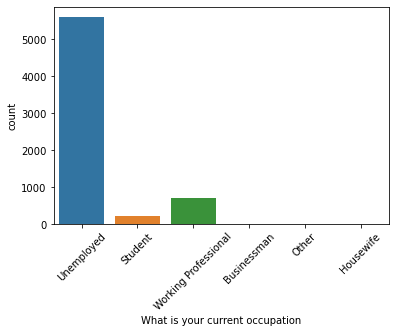

In [45]:
# LOOKING FOR DISTRIBUTION OF VALUES THROUGH VISUALISATION

sns.countplot(lead_score['What is your current occupation'])
plt.xticks(rotation=45)
plt.show()

In [46]:
# REPLACING ALL THE 'NAN' VALUES WITH 'HIGHEST OCCURENCE VARIABLE'

lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(np.nan, 'Unemployed')

In [47]:
# LOOKING AT ALL THE UNIQUE VALUES PRESENT IN IT

lead_score['Country'].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [48]:
# LOOKING FOR DISTRIBUTION OF VALUES

lead_score['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [49]:
# LOOKING FOR DISTRIBUTION OF VALUES IN PERCENTAGE

lead_score['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

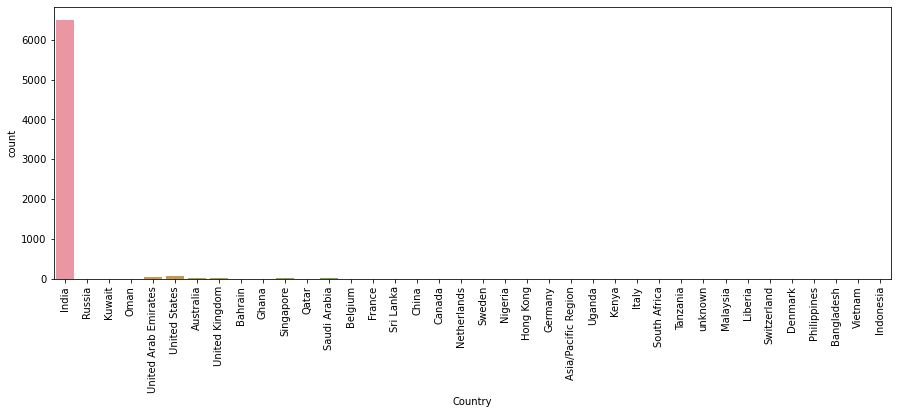

In [50]:
# LOOKING FOR DISTRIBUTION OF VALUES THORUGH VISUALISATION

plt.figure(figsize=[15,5])
sns.countplot(lead_score['Country'])
plt.xticks(rotation=90)
plt.show()

- **AS WE CAN SEE THE NUMBER OF VALUES FOR INDIA IS QUITE HIGH (approx 96%) SO WE CAN DROPPED THIS COLUMN.**

In [51]:
# DROPPING THIS COLUMN

lead_score.drop('Country', axis=1, inplace=True)

In [52]:
# LOOKING AT REMAINING NULL VALUES PERCENTAGE PRESENT IN DATA

round(lead_score.isnull().sum()/len(lead_score)*100, 2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Prospect ID                                 0.00
X Education Forums                          0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
City                                        0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Tags                                        0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
Magazine                                    0.00
Newspaper Article                           0.00
Lead Number                                 0.00
Search                                      0.00
What is your current

- **NOW IN THE REMAINING COLUMNS THE NULL VALUES PERCENTAGE ARE LESS THAN 1.5% SO WE CAN DIRECTLY DROP THE NULL VALUES AS IT WILL NOT HAMPER OUR MODEL.**

In [53]:
# DROPPING THE REMAINING NULL VALUES

lead_score.dropna(inplace=True)

In [54]:
# CROSS-CHECKING FOR NULL VALUES

round(lead_score.isnull().sum()/len(lead_score)*100, 2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

In [55]:
# DETERMINING THE ROWS & COLUMNS

lead_score.shape

(9074, 28)

- **AS WE CAN SEE AT FIRST THE ROWS & COLUMNS OF DATA-SET IS THIS `(9240, 37)` AND AFTER DROPPING THE NULL VALUES AND SOME UNWANTED COLUMNS DIRECTLY FROM THE DATA-SET WE GET THIS `(9074, 28)`.**

# STEP-3 : `TREATING OUTLIERS & IMBALANCE DATA`

## `TREATING OUTLIERS`

In [56]:
# STASTICAL DISTRIBUTION OF DATA

lead_score.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
1%,580313.730000,0.000000,0.000000,0.000000,0.000000
5%,582840.800000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000


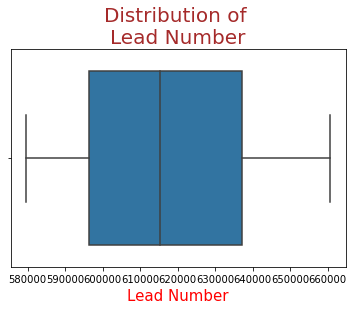

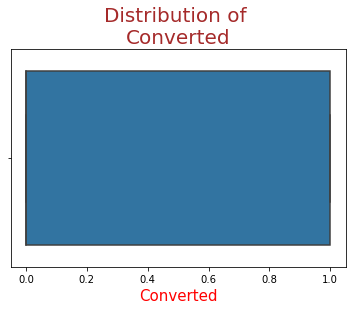

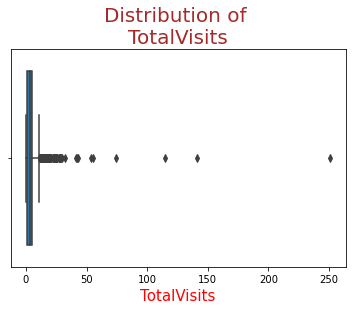

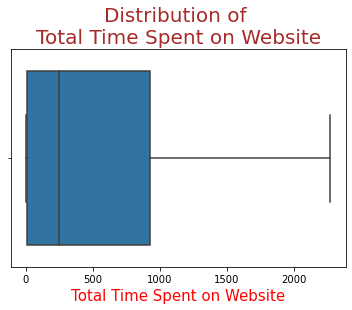

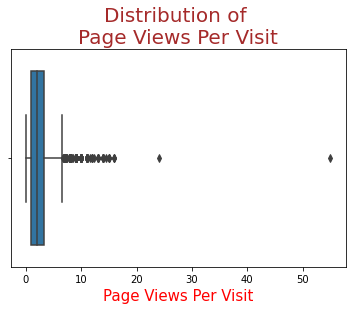

In [57]:
# I'AM CREATING A LIST AND RUNNING A FOR-LOOP FOR FINDING OUTLIERS IN COLUMNS

outliers_checking = lead_score[['Lead Number','Converted','TotalVisits','Total Time Spent on Website',
                                'Page Views Per Visit']]            # LIST COLUMN

for i in outliers_checking:
    sns.boxplot(lead_score[i])      # CREATING A BOXPLOT TO CHECK FOR OUTLIERS
    plt.xlabel(i, fontdict={"fontsize":15, "fontweight":8, "color":"red"})      # GIVING NAME FOR X-AXIS
    plt.title("Distribution of \n" +i,fontdict={"fontsize":20, "fontweight":10, "color":"brown"})   # GIVING TITLE
    plt.show()

- **AS WE CAN SEE WE HAVE OUTLIERS IN ABOVE COLUMNS.**

In [58]:
# AGAIN RUNNING A FOR-LOOP FOR THE SAME LIST AND REMOVING THE OUTLIERS OF THAT LIST

for j in outliers_checking:
    q1 = lead_score[j].quantile(0.05)   # THIS WILL GIVE ME 5% VALUE OF DATA
    q3 = lead_score[j].quantile(0.95)   # THIS WILL GIVE ME 95% VALUE OF DATA
    iqr = q3 - q1                             # INTER-QUARTILE RANGE FORMULA
    lower_bound = q1 - 1.5*iqr                # LOWER-BOUND FORMULA
    upper_bound = q3 + 1.5*iqr                # UPPER-BOUND FORMULA
    lead_score[j] = np.where(lead_score[j] < lower_bound, lower_bound, lead_score[j])
    lead_score[j] = np.where(lead_score[j] > upper_bound, upper_bound, lead_score[j])

- **I HAVE NOT REMOVED THE OUTLIERS WITH 25% AND 75% BECAUSE IN THAT CASE ATLEAST 50% OF DATA WILL GET AFFECTED AND THAT WILL AFFECT OUR MODEL IN FUTURE.**

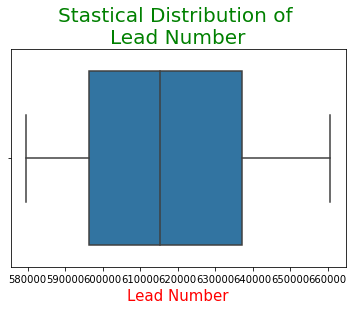

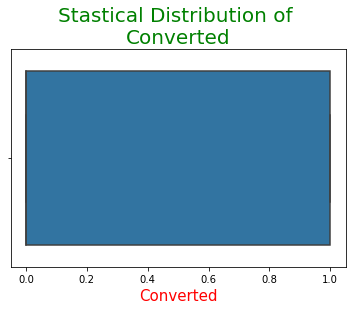

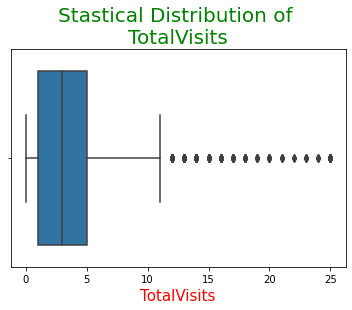

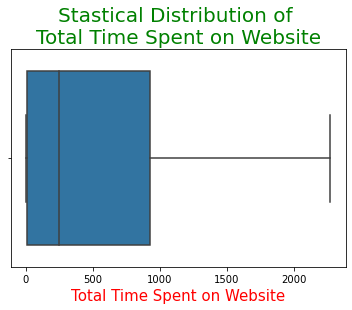

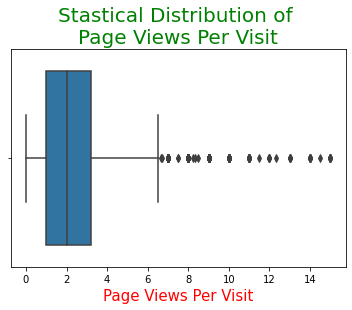

In [59]:
# CROSS-CHECKING THE OUTLIERS

for i in outliers_checking:
    sns.boxplot(lead_score[i])
    plt.xlabel(i, fontdict={"fontsize":15, "fontweight":8, "color":"red"})
    plt.title("Stastical Distribution of \n" +i,fontdict={"fontsize":20, "fontweight":10, "color":"green"})
    plt.show()

- **AS WE CAN SEE THERE ARE `OUTLIERS` IN 2 VARIABLES BUT THAT CAN BE `IGNORABLE/ACCEPTABLE` AS THE OUTLIERS ALSO FOLLOW A PATTER AND IT WILL NOT HAMPER OUR MODEL SO WE WILL NOT REMOVE THE OUTLIERS AND MOVE AHEAD WITH CASE STUDY.**

In [60]:
# GETTING THE UNIQUE VALUES PRESENT IN IT

lead_score['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import'],
      dtype=object)

In [61]:
# CHECKING FOR DISTRIBUTION OF VALUES

lead_score['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

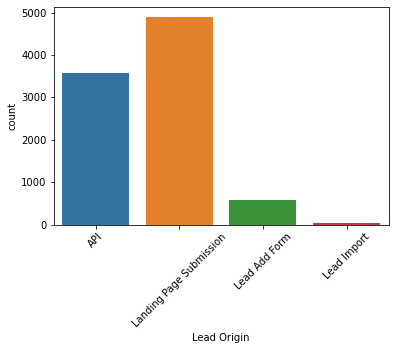

In [62]:
# CHECKING FOR DISTRIBUTION OF VALUES THROUGH VISUALISATION

sns.countplot(lead_score['Lead Origin'])
plt.xticks(rotation=45)
plt.show()

#### OBSERVATION:-
   - API and Landing Page Submission bring higher number of leads.
   - Lead Add Form & Lead Import brings lower number of leads.

## `IMBALANCE DATA`

-  **`CHECKING FOR IMBALANCED VARIABLES THAT CAN BE DROPPED`**

In [63]:
# GETTING THE FULL INFORMATION OF DATA-SET

lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   float64
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   float64
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   float64
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

In [64]:
# CONVERTING THE 'DTYPE' OF 'CONVERTED' FROM 'FLOAT64' TO 'INT64'

lead_score['Converted'] = lead_score['Converted'].astype('int64')

In [65]:
# AGAIN LOOKING AT FULL INFO AND SEEING IF DTYPE FOR CONVERTED CHANGED OR NOT

lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   float64
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   float64
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
No     9072
Yes       2
Name: Do Not Call, dtype: int64
No     99.977959
Yes     0.022041
Name: Do Not Call, dtype: float64
............................................................


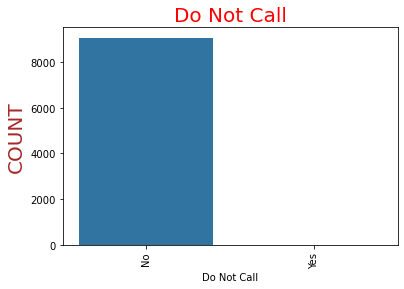

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
No     8358
Yes     716
Name: Do Not Email, dtype: int64
No     92.109323
Yes     7.890677
Name: Do Not Email, dtype: float64
............................................................


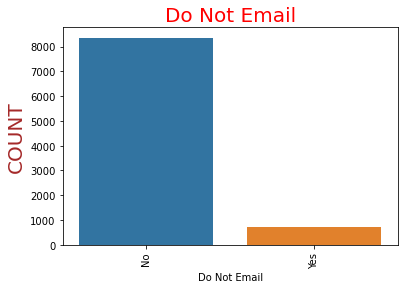

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
No     9060
Yes      14
Name: Search, dtype: int64
No     99.845713
Yes     0.154287
Name: Search, dtype: float64
............................................................


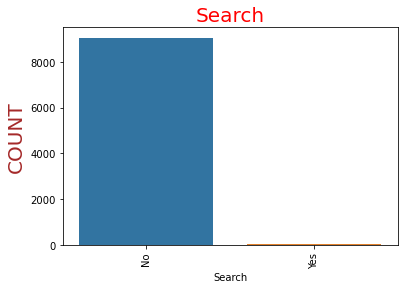

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
No    9074
Name: Magazine, dtype: int64
No    100.0
Name: Magazine, dtype: float64
............................................................


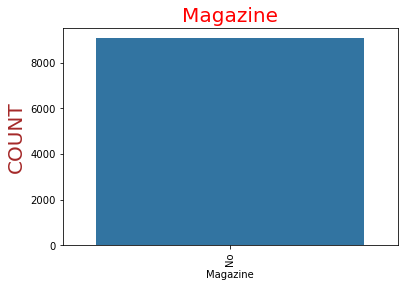

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
No     9072
Yes       2
Name: Newspaper Article, dtype: int64
No     99.977959
Yes     0.022041
Name: Newspaper Article, dtype: float64
............................................................


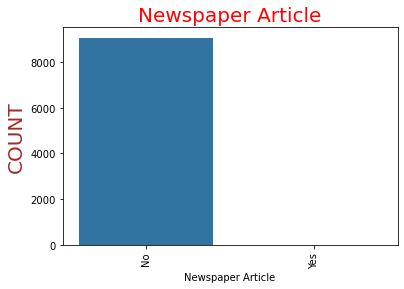

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
No     9073
Yes       1
Name: X Education Forums, dtype: int64
No     99.98898
Yes     0.01102
Name: X Education Forums, dtype: float64
............................................................


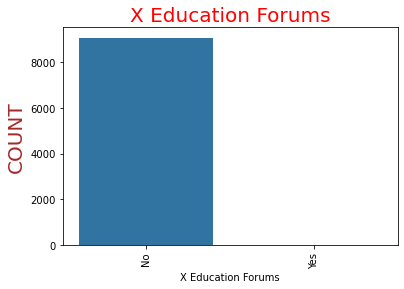

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
No     9073
Yes       1
Name: Newspaper, dtype: int64
No     99.98898
Yes     0.01102
Name: Newspaper, dtype: float64
............................................................


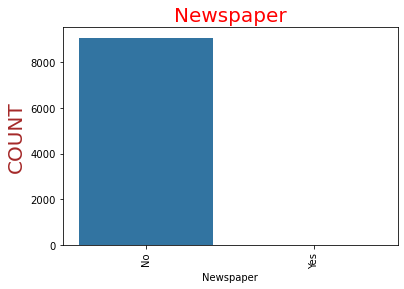

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
No     9070
Yes       4
Name: Digital Advertisement, dtype: int64
No     99.955918
Yes     0.044082
Name: Digital Advertisement, dtype: float64
............................................................


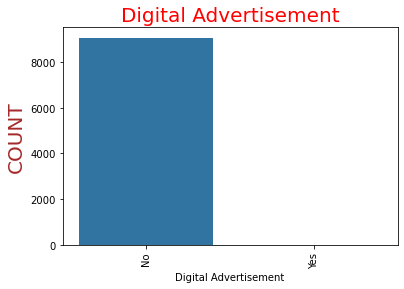

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
No     9067
Yes       7
Name: Through Recommendations, dtype: int64
No     99.922857
Yes     0.077143
Name: Through Recommendations, dtype: float64
............................................................


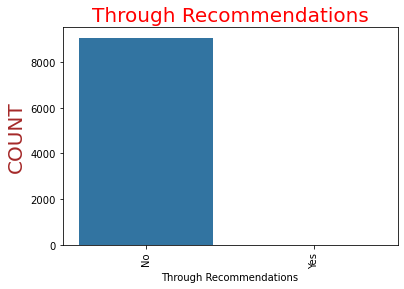

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
No    9074
Name: Receive More Updates About Our Courses, dtype: int64
No    100.0
Name: Receive More Updates About Our Courses, dtype: float64
............................................................


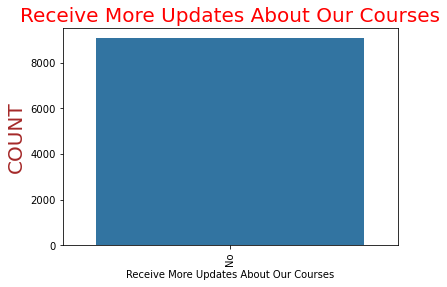

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
No    9074
Name: Update me on Supply Chain Content, dtype: int64
No    100.0
Name: Update me on Supply Chain Content, dtype: float64
............................................................


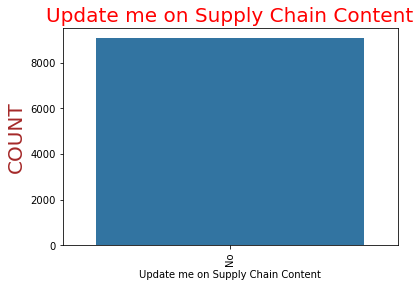

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
No    9074
Name: Get updates on DM Content, dtype: int64
No    100.0
Name: Get updates on DM Content, dtype: float64
............................................................


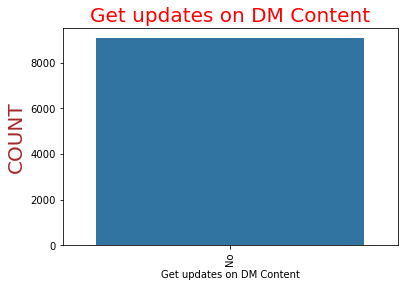

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
No    9074
Name: I agree to pay the amount through cheque, dtype: int64
No    100.0
Name: I agree to pay the amount through cheque, dtype: float64
............................................................


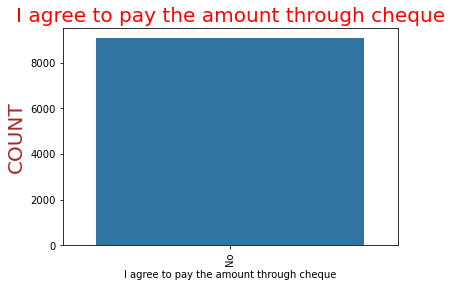

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64
No     68.172801
Yes    31.827199
Name: A free copy of Mastering The Interview, dtype: float64
............................................................


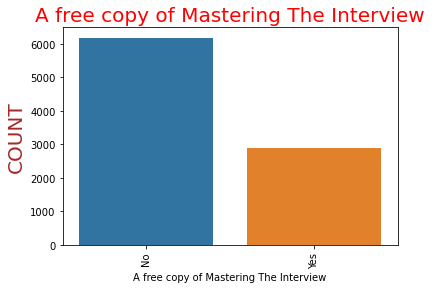

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64
Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribe

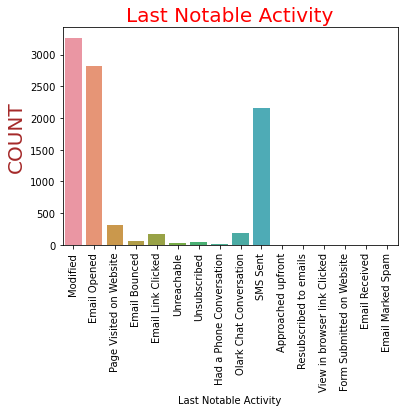

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64
Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked      

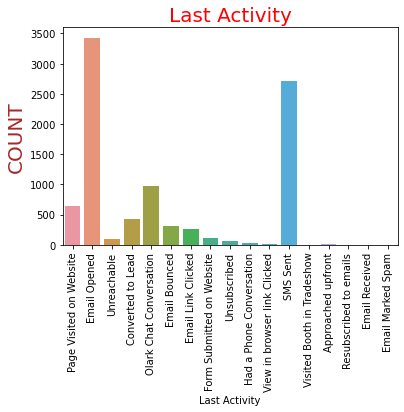

In [66]:
# CREATING A LIST OF COLUMNS & RUNNING A FOR-LOOP FOR CHECKING DATA IMBALANCE

imbalance_data_checking = ['Do Not Call','Do Not Email','Search','Magazine','Newspaper Article','X Education Forums',
                           'Newspaper','Digital Advertisement','Through Recommendations',
                           'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                           'Get updates on DM Content', 'I agree to pay the amount through cheque', 
                           'A free copy of Mastering The Interview', 'Last Notable Activity', 'Last Activity']

for i in imbalance_data_checking:
    sns.countplot(lead_score[i])                # CREATING COUNTPLOT FOR COUNTING THE OBSERVATIONS
    plt.title(i ,fontdict={"fontsize":20, "fontweight":10, "color":"red"})    # GIVING TITLE
    plt.ylabel("COUNT", fontdict={"fontsize":20, "fontweight":10, "color":"brown"})  # GIVING NAME TO Y-AXIS
    plt.xticks(rotation =90)                  # ROTATING THE NAMES OF VARIABLES GIVEN IN X-AXIS
    print("~"*60)
    print(lead_score[i].value_counts())    # COUNT OF UNIQUE VALUES IN DATA
    print("="*60)
    print(lead_score[i].value_counts(normalize=True)*100)   # PERCENTAGE COUNT OF UNIQUE VALUES IN DATA
    print("."*60)
    plt.show()

In [67]:
lead_score.shape

(9074, 28)

In [68]:
lead_score['Prospect ID'].nunique()

9074

In [69]:
lead_score['Lead Number'].nunique()

9074

### AS WE CAN SEE THERE ARE MANY DATA IMBLANCE IN OUR DATA-SET AND `PROSPECT ID` & `LEAD NUMBER` HAVE ALL THE UNIQUE VALUES SO WE WILL DROP THESE TWO AND ALL THE COLUMNS OF DATA IMBALANCE.

In [70]:
# CREATING A COLUMN OF VARIABLES WHICH WE HAVE TO DROP

columns_to_drop = ['Prospect ID','Lead Number','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums',
                           'Newspaper','Digital Advertisement','Through Recommendations',
                           'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                           'Get updates on DM Content', 'I agree to pay the amount through cheque']
print(columns_to_drop, "\n")
print("Total Columns to Drop :", len(columns_to_drop))

['Prospect ID', 'Lead Number', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'] 

Total Columns to Drop : 14


In [71]:
# DROPPING ALL THE ABOVE COLUMNS

lead_score.drop(columns_to_drop, axis=1, inplace=True)

In [72]:
# LOOKING AT REMAINING ROWS & COLUMNS

lead_score.shape

(9074, 14)

In [73]:
# GETTING INFO OF COLUMNS

lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   float64
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

# STEP-4 : `VISUALISING THE DATA`

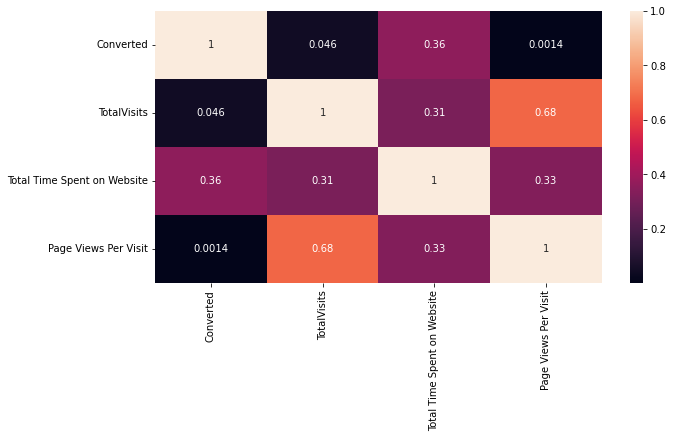

In [74]:
# PLOTTING A HEATMAP TO LOOK AT CORRELATION OF NUMERICAL VARIABLES

plt.figure(figsize=[10,5])
sns.heatmap(lead_score.corr(), annot=True)
plt.show()

### OBSERVATION :-
- **`TOTAL VISITS` & `PAGE VIEWS PER VISIT` ARE POSITIVELY CORRELATED `(0.68)`.**
- **`CONVERTED` IS POSITIVELY CORRELATED TO `TOTAL TIME SPENT ON WEBSITE` `(0.36)`.**

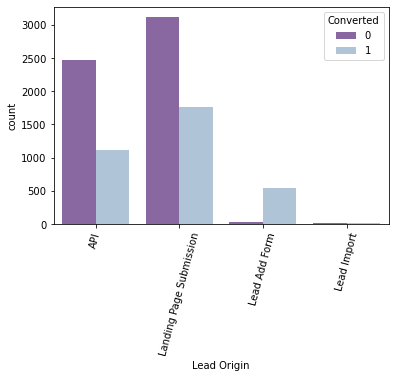

In [75]:
# LEAD_ORIGIN w.r.t. CONVERTED

sns.countplot(x='Lead Origin', hue='Converted', data=lead_score, palette="BuPu_r")
plt.xticks(rotation=75)
plt.show()

### OBSERVATION :-
- **`API` & `LANDING PAGE SUBMISSION` BRING HIGHER NUMBER OF LEADS COUNT BUT THERE CONVERSION RATE IS LESS.**
- **CONVERSION RATE OF `LEAD ADD FORM` IS HIGH BUT THE NUMBER OF COUNT IS LESS.**
- **`LEAD IMPORT` ARE VERY VERY LESS IN COUNT.**

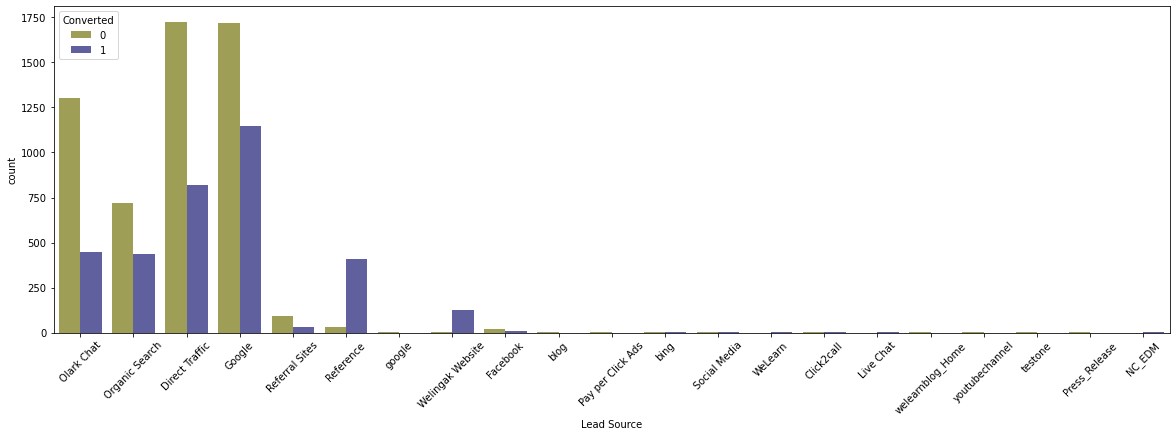

In [76]:
# LEAD_SOURCE w.r.t. CONVERTED

plt.figure(figsize=[20,6])
sns.countplot(x='Lead Source', hue='Converted', data=lead_score, palette="gist_stern_r")
plt.xticks(rotation=45)
plt.show()

In [77]:
# AS WE CAN SEE WE HAVE 2 GOOGLE 'ONE WITH CAPITAL G' & 'ONE WITH SMALL g' SO COMBINING THEM INTO ONE

lead_score['Lead Source'] = lead_score['Lead Source'].replace('google', 'Google' )


# REPLACING ALL THE 'COLUMNS HAVING VALUES VERY LESS' TO A SINGLE COLUMN NAMED 'OTHER' SO VISUALISATION WILL LOOKS GOOD

lead_score['Lead Source'] = lead_score['Lead Source'].replace([ 'bing','Click2call','Press_Release','Social Media',
                                                               'Live Chat','youtubechannel','testone','weLearn','blog',
                                                              'Pay per Click Ads','welearnblog_Home','NC_EDM','WeLearn' ],
                                                              'Others' )

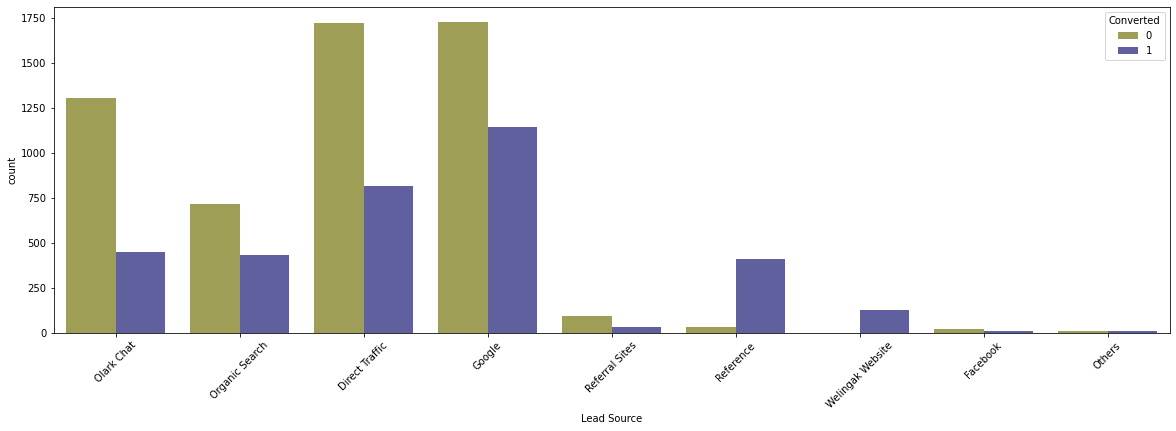

In [78]:
# AGAIN LOOKING AT LEAD_SOURCE w.r.t. CONVERTED AFTER REPLACING SOME UNNECESSARY COLUMNS

plt.figure(figsize=[20,6])
sns.countplot(x='Lead Source', hue='Converted', data=lead_score, palette="gist_stern_r")
plt.xticks(rotation=45)
plt.show()

### OBSERVATION :-
- **`GOOGLE` & `DIRECT TRAFFIC` GENERATES MAXIMUM NUMBER OF LEADS.**
- **CONVERSION RATE OF `REFERENCE` & `WELINGAK WEBSITE` IS HIGH.**

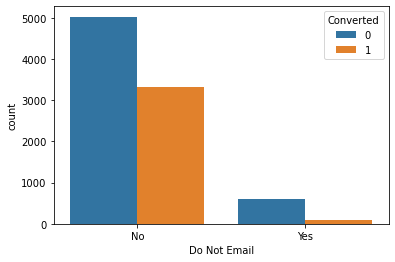

In [79]:
# DO NOT EMAIL w.r.t. CONVERTED

sns.countplot(x='Do Not Email', hue='Converted', data=lead_score)
plt.show()

### OBSERVATION :-
- **MOST OF THE LEADS DON't WANT TO BE EMAILED ABOUT THE COURSE.**

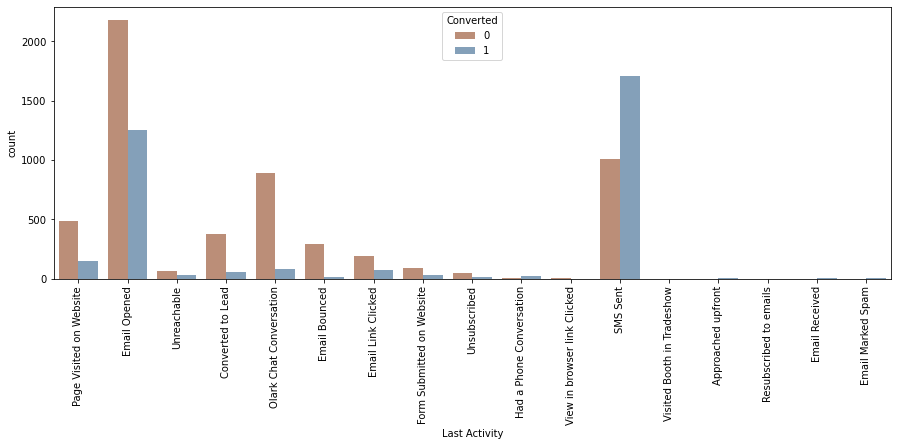

In [80]:
# LAST ACTIVITY w.r.t. CONVERTED

plt.figure(figsize=[15,5])
sns.countplot(x='Last Activity', hue='Converted', data=lead_score, palette="twilight_shifted_r")
plt.xticks(rotation=90)
plt.show()

In [81]:
# REPLACING ALL THE UNNECESSARY COLUMNS NAMES TO A SINGLE COLUMN NAMED 'OTHERS ACTIIVITY' SO VISUALISATION WILL LOOKS GOOD

lead_score['Last Activity'] = lead_score['Last Activity'].replace([ 'Approached upfront','View in browser link Clicked',
                                                                   'Email Marked Spam','Visited Booth in Tradeshow',
                                                               'Email Received','Resubscribed to emails',
                                                                   'Had a Phone Conversation' ],
                                                              'Others Activity' )

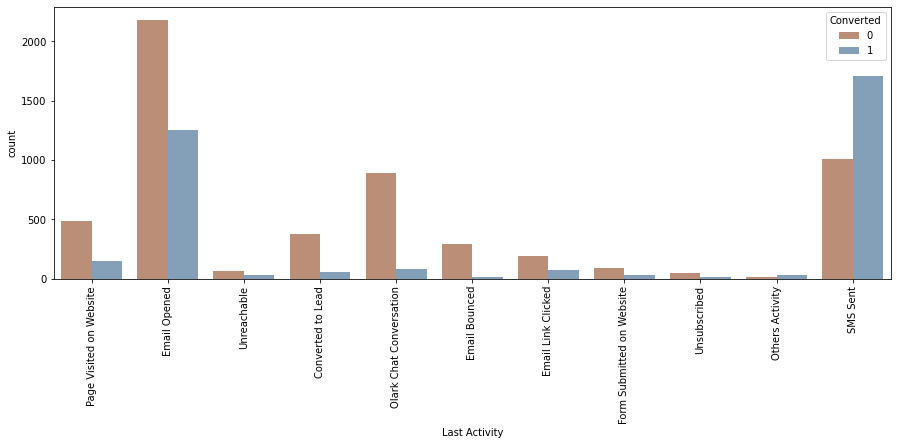

In [82]:
# AGAIN LOOKING AT LAST ACTIVITY w.r.t. CONVERTED AFTER SOME CHANGES

plt.figure(figsize=[15,5])
sns.countplot(x='Last Activity', hue='Converted', data=lead_score, palette="twilight_shifted_r")
plt.xticks(rotation=90)
plt.show()

### OBSERVATION :-
- **CONVERSION RATE FOR LEADS WITH THERE LAST ACTIVITY AS `SMS SENT` IS HIGH.**
- **MOST OF THE LEADS HAVE THERE `EMAIL OPENED` IN THERE LAST ACTIVITY.**

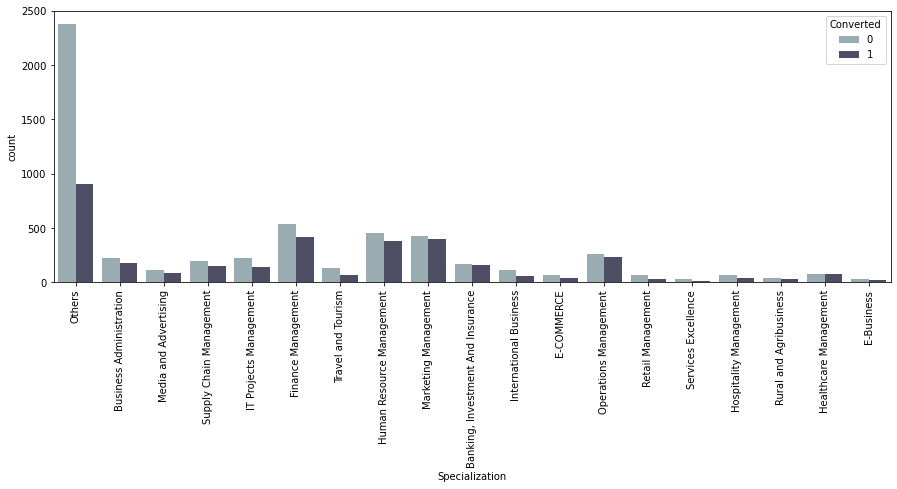

In [83]:
# SPECALIZATION w.r.t. CONVERTED

plt.figure(figsize=[15,5])
sns.countplot(x='Specialization', hue='Converted', data=lead_score, palette="bone_r")
plt.xticks(rotation=90)
plt.show()

### OBSERVATION :-
- **NON-CONVERSION RATE IS MORE THAN CONVERSION RATE IN EVERY SPECIALISATION.**
- **`OTHER's` CATEGORY SPECIALISATION(maybe student's or someone else) HAS MAXIMUM CONVERTED LEADS.**

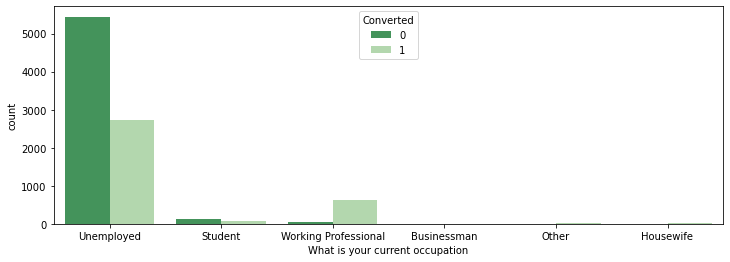

In [84]:
# CURRENT OCCUPATION w.r.t. CONVERTED

plt.figure(figsize=[12,4])
sns.countplot(x='What is your current occupation', hue='Converted', data=lead_score, palette="Greens_r")
plt.show()

### OBSERVATION :-
- **`UNEMPLOYED` LEADS ARE THE MOST IN NUMBERS BUT THERE CONVERSION RATE IS HALF THE NUMBER OF LEADS.**
- **`WORKING PROFESSIONAL` HAVE HIGH CHANCES OF JOINING THE COURSE AS THERE CONVERSION RATE IS GOOD.**

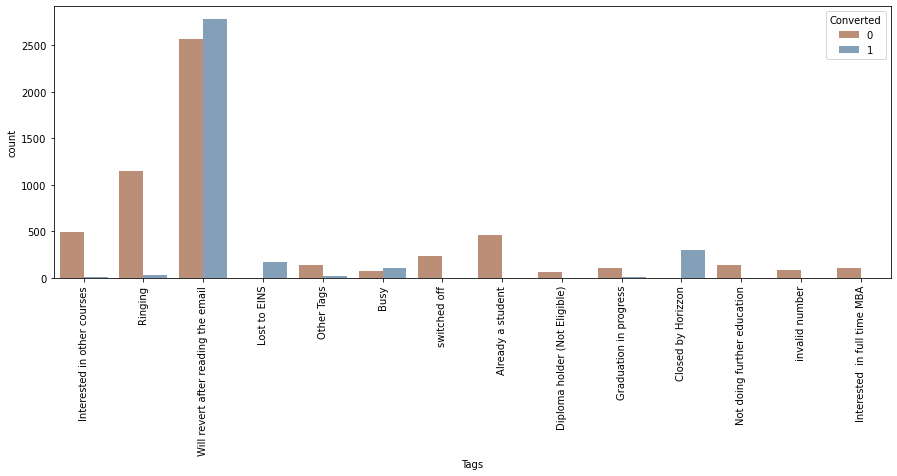

In [85]:
# TAGS w.r.t. CONVERTED

plt.figure(figsize=[15,5])
sns.countplot(x='Tags', hue='Converted', data=lead_score, palette="twilight_shifted_r")
plt.xticks(rotation=90)
plt.show()

### OBSERVATION :-
- **`WILL REVERT AFTER READING THE EMAIL` HAS MAXIMUM NUMBER OF LEADS COUNT & IT's CONVERSION RATE IS ALSO GOOD.**
- **`CLOSED BY HORIZON` & `LOST TO EINS` HAS GOOD CONVERSION RATE BUT THERE NUMBER OF COUNT IS NOT GOOD.**

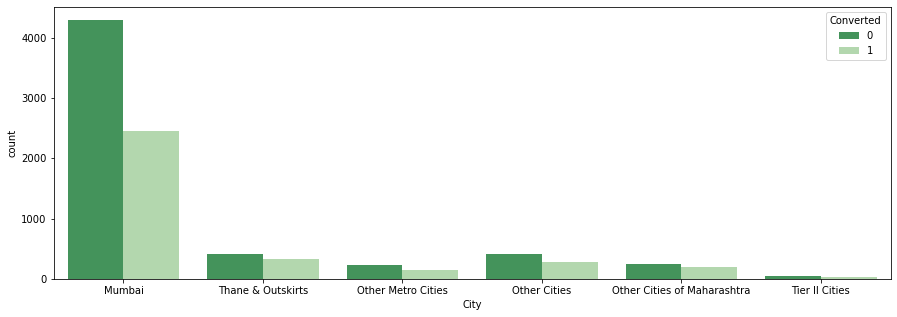

In [86]:
# CITY w.r.t. CONVERTED

plt.figure(figsize=[15,5])
sns.countplot(x='City', hue='Converted', data=lead_score, palette="Greens_r")
plt.show()

### OBSERVATION :-
- **MOST LEADS ARE FROM `MUMBAI`.**
- **CONVERSION RATE OF ALL THE CITY ARE LESS.**

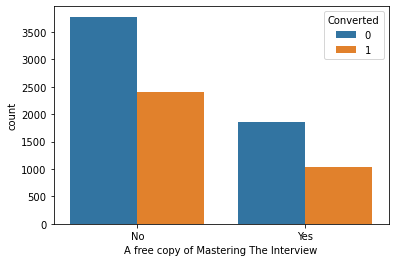

In [87]:
# FREE COPY OF MASTERING THE INTERVIEW w.r.t. CONVERTED

sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=lead_score)
plt.show()

### OBSERVATION :-
- **THE PATTERNS LOOK EXACTLY THE SAME FOR BOTH `YES` & `NO` BUT THE COUNT OF `NO's` ARE MORE.**
- **NO INFERENCE CAN BE DRAWN FROM THIS.**

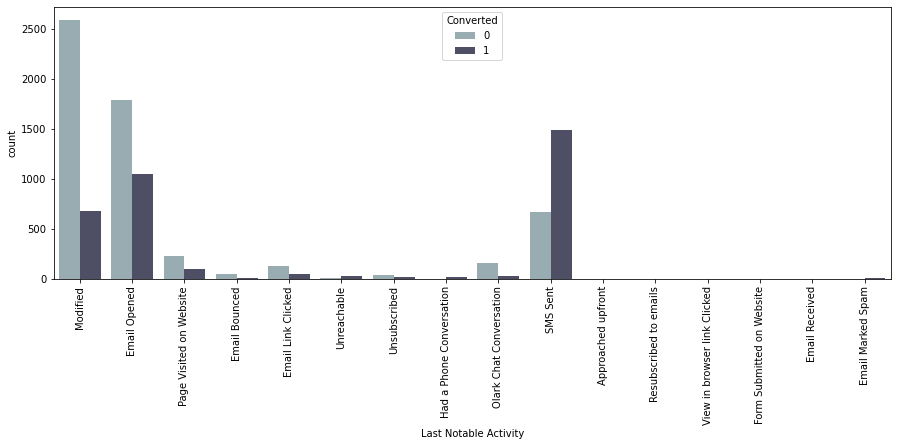

In [88]:
# LAST NOTABLE ACTIVITY w.r.t. CONVERTED

plt.figure(figsize=[15,5])
sns.countplot(x='Last Notable Activity', hue='Converted', data=lead_score, palette="bone_r")
plt.xticks(rotation=90)
plt.show()

In [89]:
# REPLACING ALL THE UNNECESSARY COLUMNS NAMES TO SINGLE COLUMN NAMED 'OTHERS ACTIVITY' SO VISUALISATION LOOKS GOOD

lead_score['Last Notable Activity'] = lead_score['Last Notable Activity'].replace(['Approached upfront',
                                                                                   'View in browser link Clicked',
                                                                   'Email Marked Spam','Form Submitted on Website',
                                                               'Email Received','Resubscribed to emails',
                                                                   'Had a Phone Conversation','Unreachable' ],
                                                              'Others Activity' )

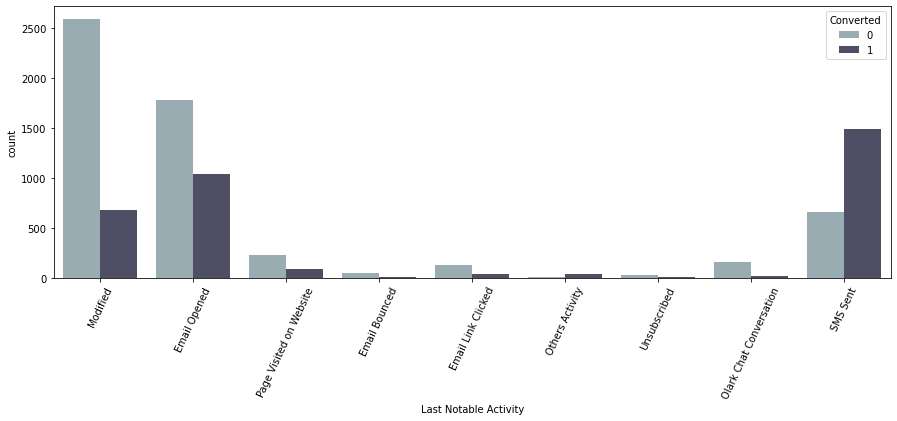

In [90]:
# AGAIN LOOKING AT LAST NOTABLE ACTIVITY w.r.t. CONVERTED AFTER SOME CHANGES

plt.figure(figsize=[15,5])
sns.countplot(x='Last Notable Activity', hue='Converted', data=lead_score, palette="bone_r")
plt.xticks(rotation=65)
plt.show()

### OBSERVATION :-
- **CONVERSION RATE FOR LEADS WITH THERE LAST NOTABLE ACTIVITY AS `SMS SENT` IS HIGH.**
- **MOST OF THE LEADS HAVE `MODIFIED` & HAVE THERE `EMAIL OPENED` IN THERE LAST NOTABLE ACTIVITY.**

In [91]:
# GETTING THE INFO OF REMAINING DATA

lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   float64
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

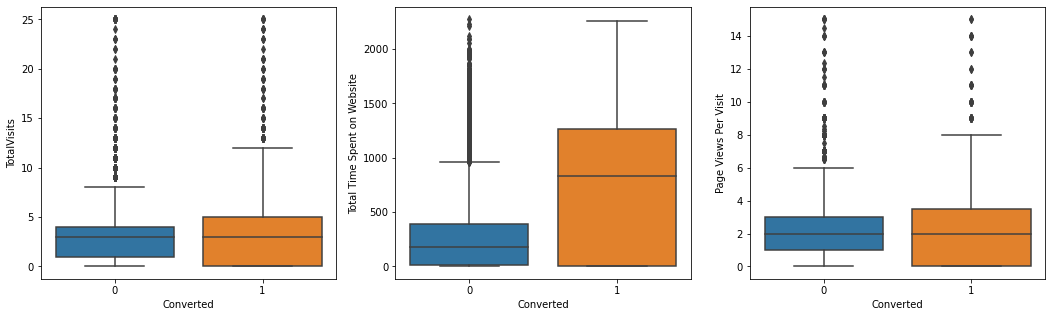

In [92]:
# VISUALISING NUMERICAL VARIABLES

plt.figure(figsize=[18,5])
plt.subplot(1,3,1)
sns.boxplot(x = 'Converted', y = 'TotalVisits', data = lead_score)
plt.subplot(1,3,2)
sns.boxplot(x = 'Converted', y = 'Total Time Spent on Website', data = lead_score)
plt.subplot(1,3,3)
sns.boxplot(x = 'Converted', y = 'Page Views Per Visit', data = lead_score)
plt.show()

### OBSERVATION :-
- **LEADS SPENDING `MORE TIME ON THE WEBSITE` ARE MORE LIKELY TO BE CONVERTED.**
- **MEDIANS FOR CONVERTED & NOT-CONVERTED OF `TOTAL VISITS` & `PAGE VIEWS PER VISIT` ARE SAME.**

# STEP-5 : `DATA PREPRATION (mapping & dummy variables)`

## `MAPPING`

In [93]:
# LOOKING AT FIRST FIVE ROWS OF DATA-SET

lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305.0,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [94]:
# MAPPING 'DO NOT EMAIL' & 'A FREE COPY....' COLUMN AS THEY ARE IN 'YES-NO' FORMAT

lead_score['Do Not Email'] = lead_score['Do Not Email'].map({'Yes':1, 'No':0})

lead_score['A free copy of Mastering The Interview']=lead_score['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})

In [95]:
# CHECKING IF MAPPING IS DONE OR NOT

lead_score['Do Not Email'].value_counts()

0    8358
1     716
Name: Do Not Email, dtype: int64

In [96]:
# CHECKING IF MAPPING IS DONE OR NOT

lead_score['A free copy of Mastering The Interview'].value_counts()

0    6186
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

## `DUMMY VARIABLES`

In [97]:
# CREATING DUMMY VARIABLES FOR 'OTHER CATEGORICAL COLUMNS' AND DROPPING FIRST

dummy_variables = pd.get_dummies(lead_score[['Lead Origin','Lead Source','Last Activity','Specialization',
                                             'What is your current occupation','Tags','City','Last Notable Activity']],
                                  drop_first=True)
dummy_variables.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [98]:
# CONCATENATING THE DUMMY VARS WITH MAIN DATA-SET

lead_score = pd.concat([lead_score, dummy_variables], axis=1)
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,API,Olark Chat,0,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305.0,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [99]:
# DROPPING THE MAIN COLUMNS BECAUSE WE HAVE CREATED THE DUMMY VARS OF THESE COLUMNS SO THEY ARE OF NO USE TO THE MODEL

lead_score.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 
                 'Tags', 'City', 'Last Notable Activity'], axis=1, inplace=True)

lead_score.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674.0,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,2.0,1532.0,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1.0,305.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,2.0,1428.0,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [100]:
# GETTING THE SHAPE OF DATA-SET AFTER ADDING DUMMIES AND DROPPING SOME COLUMNS

lead_score.shape

(9074, 76)

# STEP-6 : `SPLITTING INTO TRAIN-TEST SET`

In [101]:
# WE HAVE ALREADY IMPORTED THE NECESSARY LIBRARY FOR TRAIN-TEST SPLIT
# SPLITTING DATA-SET INTO TRAIN-TEST SET WITH 70-30 RATIO

df_train, df_test = train_test_split(lead_score, train_size=0.7, test_size=0.3, random_state=100)

print(df_train.shape)
print(df_test.shape)

(6351, 76)
(2723, 76)


In [102]:
# DIVIDING TRAIN & TEST SET INTO 'X' AND 'y'

X_train = df_train
y_train = df_train.pop('Converted')

X_test = df_test
y_test = df_test.pop('Converted')

In [103]:
# CHECKING IF THEY ARE DIVIDED OR NOT

X_train.head(2)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
3009,0,2.0,397.0,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1012,1,2.0,190.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
# CHECKING IF THEY ARE DIVIDED OR NOT

y_train.head(2)

3009    0
1012    0
Name: Converted, dtype: int64

In [105]:
# CHECKING IF THEY ARE DIVIDED OR NOT

X_test.head(2)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
3271,0,4.0,157.0,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1490,0,5.0,1513.0,5.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [106]:
# CHECKING IF THEY ARE DIVIDED OR NOT

y_test.head(2)

3271    0
1490    1
Name: Converted, dtype: int64

# STEP-7 : `RESCALING`

### STEPS FOR RESCALING :-
1. INSTANTIATE AN OBJECT
2. CREATE A LIST OF NUMERIC VARIABLES
3. FIT ON DATA :-
    - fit(): `learns xmin, xmax`
    - transform(): `(x - xmin) / (xmax - xmin)`
    - fit_transform(): `done both at one go`

In [107]:
# STEP - 1
scaler = StandardScaler()

In [108]:
# STEP - 2 & STEP - 3

varList = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_train[varList] = scaler.fit_transform(X_train[varList])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
3009,0,-0.403152,-0.160255,-0.180005,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1012,1,-0.403152,-0.540048,-0.180005,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-0.980472,-0.888650,-1.139080,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4750,0,-0.403152,1.643304,-0.180005,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
7987,0,0.462829,2.017593,0.059764,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [109]:
# CHECKING THE LEAD CONVERSION RATE

converted = sum(lead_score['Converted'] / len(lead_score['Converted'].index)*100)
converted

37.85541106457961

- **`THE LEAD CONVERSION RATE IS 38% (APPROX.).`**

# STEP-8 : `BUILDING A LINEAR MODEL`

## `MODEL - 1`

- **FIRST MODEL IS WITH ALL THE COLUMNS**

In [110]:
# ADDING CONSTANT
X_train_sm = sm.add_constant(X_train)

# BUILDING LOGISTIC REGRESSION MODEL
logmodel_1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# FIT THE MODEL & LOOK AT SUMMARY
logmodel_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6275
Model Family:                Binomial   Df Model:                           75
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1563.0
Date:                Tue, 21 Mar 2023   Deviance:                       3126.0
Time:                        12:24:25   Pearson chi2:                 1.33e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5687
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6122      2.051     -0.786      0.432      -5.633       2.408
Do Not Email                                            -1.6133      0.291     -5.545      0.000      -2.184      -1.043
TotalVisits                                              0.1333      0.069      1.929      0.054      -0.002       0.269
Total Time Spent on Website                              1.1724      0.057     20.729      0.000       1.062       1.283
Page Views Per Visit                                    -0.1614      0.075     -2.145      0.032      -0.309      -0.014
A free copy of Mastering The Interview                  -0.3299      0.153     -2.157      0.031      -0.630      -0.030
Lead Origin_Landing Page Submission                     -1.2571      0.186     -6.749      0.000      -1.622      -0.892
Lead Origin_Lead Add Form                                0.6538      1.290      0.507      0.612      -1.874       3.182
Lead Origin_Lead Import                                 27.4236   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Facebook                                   -26.1888   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                       0.0024      0.158      0.015      0.988      -0.306       0.311
Lead Source_Olark Chat                                   0.7726      0.215      3.592      0.000       0.351       1.194
Lead Source_Organic Search                               0.1701      0.180      0.943      0.346      -0.183       0.523
Lead Source_Others                                       0.2362      0.791      0.298      0.765      -1.315       1.787
Lead Source_Reference                                    2.0695      1.333      1.552      0.121      -0.544       4.683
Lead Source_Referral Sites                              -0.0728      0.428     -0.170      0.865      -0.911       0.766
Lead Source_Welingak Website                             4.1930      1.491      2.813      0.005       1.271       7.115
Last Activity_Email Bounced                             -0.8598      0.815     -1.055      0.291      -2.457       0.737
Last Activity_Email Link Clicked                         0.8851      0.562      1.575      0.115      -0.216       1.987
Last Activity_Email Opened                              -0.0205      0.333     -0.062      0.951      -0.673       0.632
Last Activity_Form Submitted on Website                 -0.0127      0.523     -0.024      0.981      -1.037       1.011
Last Activity_Olark Chat Conversation                   -0.5488      0.343     -1.601      0.109      -1.221       0.123
Last Activity_Others Activity                            1

## `FEATURE SELECTION USING RFE`

In [111]:
# CREATE LOGISTIC REGRESSION MODEL

logReg = LogisticRegression()

In [112]:
# RUNNING RFE WITH 15 FEATURE TO SELECT ON THE MODEL
rfe = RFE(estimator=logReg, n_features_to_select=15)        # feature scaling using 15 

# FIT THE MODEL
rfe = rfe.fit(X_train, y_train)

In [113]:
# CHECKING THE COLUMNS NAME, SUPPORT & RANKS OF VARIABLES

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 38),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 37),
 ('A free copy of Mastering The Interview', False, 28),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 11),
 ('Lead Source_Facebook', False, 40),
 ('Lead Source_Google', False, 59),
 ('Lead Source_Olark Chat', False, 12),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Others', False, 49),
 ('Lead Source_Reference', False, 14),
 ('Lead Source_Referral Sites', False, 46),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 26),
 ('Last Activity_Email Link Clicked', False, 23),
 ('Last Activity_Email Opened', False, 61),
 ('Last Activity_Form Submitted on Website', False, 36),
 ('Last Activity_Olark Chat Conversation', False, 13),
 ('Last Activity_Others Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 41),


In [114]:
# STORING ALL THE SUPPORTED COLUMNS IN ONE VARIABLE

col_supported = X_train.columns[rfe.support_]
print(col_supported, "\n")
print("Total columns supported :", len(col_supported))

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Others Activity', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Unemployed',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Last Notable Activity_SMS Sent'],
      dtype='object') 

Total columns supported : 15


In [115]:
# CHECKING WHICH COLUMNS IT DOESN't SUPPORT

print(X_train.columns[~rfe.support_], "\n")
print("Total columns not supported :", len(X_train.columns[~rfe.support_]))

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Man

## `BUILDING MODEL USING STATSMODEL FOR DETAILED STATISTICS`

In [116]:
# CREATING A DATA-FRAME WITH RFE SELECTED VARIABLES

X_train_rfe = X_train[col_supported]

## `MODEL - 2`

In [117]:
# ADDING CONSTANT
X_train_rfe = sm.add_constant(X_train_rfe)

# BUILDING LOGISTIC REGRESSION MODEL & FIT THE MODEL
logmodel_2 = sm.GLM(y_train, X_train_rfe, family=sm.families.Binomial()).fit()

# LOOK AT SUMMARY
logmodel_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1959.8
Date:                Tue, 21 Mar 2023   Deviance:                       3919.6
Time:                        12:24:36   Pearson chi2:                 1.07e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5112
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.7077      0.248     -2.854      0.004      -1.194      -0.222
Do Not Email                                  -1.8104      0.207     -8.731      0.000      -2.217      -1.404
Lead Origin_Landing Page Submission           -1.4369      0.148     -9.680      0.000      -1.728      -1.146
Lead Origin_Lead Add Form                      1.7601      0.323      5.446      0.000       1.127       2.394
Lead Source_Welingak Website                   2.6159      0.810      3.230      0.001       1.029       4.203
Last Activity_Others Activity                  1.9828      0.564      3.518      0.000       0.878       3.087
Last Activity_Unsubscribed                     2.6177      0.549      4.770      0.000       1.542       3.693
Specialization_Others                         -2.1260      0.151    -14.059      0.000      -2.422      -1.830
What is your current occupation_Unemployed    -2.3636      0.192    -12.292      0.000      -2.740      -1.987
Tags_Busy                                      3.2170      0.296     10.858      0.000       2.636       3.798
Tags_Closed by Horizzon                        8.5791      0.741     11.579      0.000       7.127      10.031
Tags_Lost to EINS                              8.5681      0.744     11.524      0.000       7.111      10.025
Tags_Ringing                                  -0.9732      0.305     -3.192      0.001      -1.571      -0.376
Tags_Will revert after reading the email       3.9654      0.192     20.618      0.000       3.588       4.342
Tags_invalid number                          -21.4292   1.46e+04     -0.001      0.999   -2.87e+04    2.87e+04
Last Notable Activity_SMS Sent                 2.8598      0.113     25.231      0.000       2.638       3.082
==============================================================================================================
"""

## `CHECKING VIF`

In [118]:
# DROPPING THE CONSTANT FOR CALCULATING VIF

X_train_rfe.drop('const', axis=1, inplace=True)

In [119]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_Unemployed,7.22
1,Lead Origin_Landing Page Submission,4.45
12,Tags_Will revert after reading the email,3.45
6,Specialization_Others,3.41
2,Lead Origin_Lead Add Form,1.68
11,Tags_Ringing,1.66
14,Last Notable Activity_SMS Sent,1.47
3,Lead Source_Welingak Website,1.34
9,Tags_Closed by Horizzon,1.24
0,Do Not Email,1.18


In [120]:
# DROPPING ONE VARIABLE WITH HIGH P-VALUE

X_train_rfe.drop('Tags_invalid number', axis=1, inplace=True)

## `MODEL - 3`

In [121]:
# ADDING CONSTANT
X_train_rfe = sm.add_constant(X_train_rfe)

# BUILDING LOGISTIC REGRESSION MODEL & FIT THE MODEL
logmodel_3 = sm.GLM(y_train, X_train_rfe, family=sm.families.Binomial()).fit()

# LOOK AT SUMMARY
logmodel_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1962.9
Date:                Tue, 21 Mar 2023   Deviance:                       3925.7
Time:                        12:24:37   Pearson chi2:                 1.11e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5108
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.7628      0.250     -3.049      0.002      -1.253      -0.272
Do Not Email                                  -1.8075      0.207     -8.722      0.000      -2.214      -1.401
Lead Origin_Landing Page Submission           -1.4476      0.149     -9.726      0.000      -1.739      -1.156
Lead Origin_Lead Add Form                      1.7683      0.324      5.457      0.000       1.133       2.403
Lead Source_Welingak Website                   2.6052      0.810      3.216      0.001       1.018       4.193
Last Activity_Others Activity                  1.9934      0.567      3.514      0.000       0.882       3.105
Last Activity_Unsubscribed                     2.6094      0.548      4.764      0.000       1.536       3.683
Specialization_Others                         -2.1321      0.152    -14.062      0.000      -2.429      -1.835
What is your current occupation_Unemployed    -2.3927      0.194    -12.334      0.000      -2.773      -2.012
Tags_Busy                                      3.3183      0.295     11.261      0.000       2.741       3.896
Tags_Closed by Horizzon                        8.6709      0.741     11.705      0.000       7.219      10.123
Tags_Lost to EINS                              8.6608      0.743     11.651      0.000       7.204      10.118
Tags_Ringing                                  -0.8679      0.303     -2.864      0.004      -1.462      -0.274
Tags_Will revert after reading the email       4.0586      0.191     21.196      0.000       3.683       4.434
Last Notable Activity_SMS Sent                 2.8441      0.113     25.234      0.000       2.623       3.065
==============================================================================================================
"""

In [122]:
# DROPPING CONSTANT FOR CALCULATING VIF

X_train_rfe.drop('const', axis=1, inplace=True)

In [123]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_Unemployed,7.16
1,Lead Origin_Landing Page Submission,4.44
6,Specialization_Others,3.41
12,Tags_Will revert after reading the email,3.35
2,Lead Origin_Lead Add Form,1.68
11,Tags_Ringing,1.63
13,Last Notable Activity_SMS Sent,1.46
3,Lead Source_Welingak Website,1.34
9,Tags_Closed by Horizzon,1.24
0,Do Not Email,1.18


In [124]:
# DROPPING ONE VARIABLE WITH HIGH VIF-VALUE

X_train_rfe.drop('What is your current occupation_Unemployed', axis=1, inplace=True)

## `MODEL - 4`

In [125]:
# ADDING CONSTANT
X_train_rfe = sm.add_constant(X_train_rfe)

# BUILDING LOGISTIC REGRESSION MODEL & FIT THE MODEL
logmodel_4 = sm.GLM(y_train, X_train_rfe, family=sm.families.Binomial()).fit()

# LOOK AT SUMMARY
logmodel_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2063.1
Date:                Tue, 21 Mar 2023   Deviance:                       4126.3
Time:                        12:24:37   Pearson chi2:                 1.03e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4951
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6634      0.209    -12.744      0.000      -3.073      -2.254
Do Not Email                                -1.8193      0.199     -9.142      0.000      -2.209      -1.429
Lead Origin_Landing Page Submission         -1.5363      0.145    -10.577      0.000      -1.821      -1.252
Lead Origin_Lead Add Form                    1.9433      0.323      6.007      0.000       1.309       2.577
Lead Source_Welingak Website                 2.3874      0.810      2.947      0.003       0.800       3.975
Last Activity_Others Activity                2.1068      0.547      3.849      0.000       1.034       3.180
Last Activity_Unsubscribed                   2.6132      0.519      5.034      0.000       1.596       3.631
Specialization_Others                       -2.4044      0.149    -16.114      0.000      -2.697      -2.112
Tags_Busy                                    2.9741      0.287     10.357      0.000       2.411       3.537
Tags_Closed by Horizzon                      8.4638      0.737     11.478      0.000       7.019       9.909
Tags_Lost to EINS                            8.3793      0.740     11.317      0.000       6.928       9.831
Tags_Ringing                                -1.2104      0.297     -4.079      0.000      -1.792      -0.629
Tags_Will revert after reading the email     3.8858      0.184     21.144      0.000       3.526       4.246
Last Notable Activity_SMS Sent               2.8093      0.110     25.610      0.000       2.594       3.024
============================================================================================================
"""

In [126]:
# DROPPING CONSTANT FOR CALCULATING VIF

X_train_rfe.drop('const', axis=1, inplace=True)

In [127]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,3.03
1,Lead Origin_Landing Page Submission,2.55
6,Specialization_Others,1.94
2,Lead Origin_Lead Add Form,1.66
10,Tags_Ringing,1.52
12,Last Notable Activity_SMS Sent,1.46
3,Lead Source_Welingak Website,1.34
8,Tags_Closed by Horizzon,1.23
0,Do Not Email,1.18
7,Tags_Busy,1.09


- **AS WE CAN SEE THE VIF OF ALL THE REMAINING COLUMNS IS LESS THAN 5 AND THE GENERAL THUMB OF RULE IS THAT WE DROP THE VARIABLES WHICH HAVE VIF > 5. SO NOW THIS IS OUR FINAL MODEL.**

In [128]:
# ADDING CONSTANT

X_train_rfe = sm.add_constant(X_train_rfe)

In [129]:
# GETTING Y-PREDICTED

y_train_pred = logmodel_4.predict(X_train_rfe)
y_train_pred[:10]

3009    0.422134
1012    0.010584
9226    0.001873
4750    0.923812
7987    0.984925
1281    0.923812
2880    0.422134
4971    0.957709
7536    0.422134
1248    0.004451
dtype: float64

In [130]:
# RESHAPING THE Y-PREDICTED VALUE

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.42213408, 0.01058392, 0.00187319, 0.92381161, 0.98492521,
       0.92381161, 0.42213408, 0.95770947, 0.42213408, 0.00445103])

In [131]:
# CREATING A DATAFRAME WITH ACTUAL CONVERTED & THE CONVERTED_PROBABILITY

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.422134,3009
1,0,0.010584,1012
2,0,0.001873,9226
3,1,0.923812,4750
4,1,0.984925,7987


In [132]:
# CREATING NEW COLUMN 'PREDICTED' WITH 1 IF CONVERTED_PROB > 0.5 ELSE 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.422134,3009,0
1,0,0.010584,1012,0
2,0,0.001873,9226,0
3,1,0.923812,4750,1
4,1,0.984925,7987,1


In [133]:
# CALCULATING CONFUSION METRICE

confusion = metrics.confusion_matrix(y_true=y_train_pred_final.Converted, y_pred=y_train_pred_final.Predicted)
confusion

array([[3744,  161],
       [ 758, 1688]], dtype=int64)

In [134]:
# CALCULATING ACCURACY SCORE

metrics.accuracy_score(y_true=y_train_pred_final.Converted, y_pred=y_train_pred_final.Predicted)

0.8552983782081562

## `METRICS BEYOND SIMPLY ACCURACY`

In [135]:
TP = confusion[1,1]  # true positive
TN = confusion[0,0]  # true negative
FP = confusion[0,1]  # false positive
FN = confusion[1,0]  # fasle negative

In [136]:
# LET's CALCULATE SENSITIVITY OF OUR REGRESSION MODEL

TP / float(TP+FN)

0.6901062959934587

In [137]:
# LET's CALCULATE SPECIFICITY

TN / float(TN+FP)

0.9587708066581306

In [138]:
# Calculate false postive rate - predicting converted when customer does not have converted

print(FP/ float(TN+FP))

0.0412291933418694


In [139]:
# positive predictive value 

print (TP / float(TP+FP))

0.9129259058950784


In [140]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8316303864948912


# STEP-9 : `PLOTTING ROC CURVE`

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [141]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [142]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

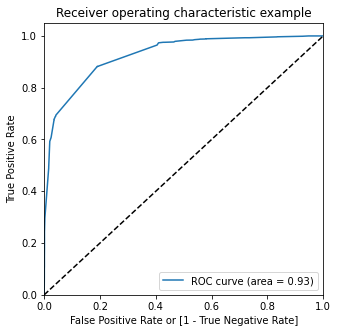

In [143]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# STEP-10 : `FINDING OPTIMAL CUTOFF POINT`

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [144]:
# LET's CREATE COLUMNS WITH DIFFERENT PROBABILITY CUTOFFS

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.422134,3009,0,1,1,1,1,1,0,0,0,0,0
1,0,0.010584,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.001873,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.923812,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.984925,7987,1,1,1,1,1,1,1,1,1,1,1


In [145]:
# NOW LET's CALCULATE ACCURACY, SENSITIVITY & SPECIFICITY FOR VARIOUS PROBABILITY CUTOFFS

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.705401  0.976697  0.535467
0.2   0.2  0.737837  0.973426  0.590269
0.3   0.3  0.836404  0.882257  0.807682
0.4   0.4  0.837821  0.881439  0.810499
0.5   0.5  0.855298  0.690106  0.958771
0.6   0.6  0.855613  0.687653  0.960819
0.7   0.7  0.853094  0.675388  0.964405
0.8   0.8  0.833570  0.607114  0.975416
0.9   0.9  0.794993  0.493459  0.983867


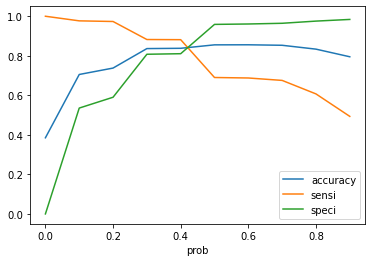

In [146]:
# LET's PLOT ACCURACY, SENSITIVITY & SPECIFICITY FOR VARIOUS PROBABILITIES

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [147]:
# CREATING NEW COLUMN 'PREDICTED' WITH 1 IF CONVERTED_PROB > 0.42 ELSE 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)


# CREATING NEW COLUMN 'LEAD SCORE' WHICH DECIDES WHEATHER THE LEAD IS 'HOT' OR LEAD IS 'COLD'
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map(lambda x : round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Lead_Score
0,0,0.422134,3009,1,1,1,1,1,1,0,0,0,0,0,42
1,0,0.010584,1012,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0.001873,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.923812,4750,1,1,1,1,1,1,1,1,1,1,1,92
4,1,0.984925,7987,1,1,1,1,1,1,1,1,1,1,1,98


In [148]:
# CALCULATING CONFUSION MATRICE

confusion_metrice = metrics.confusion_matrix(y_true=y_train_pred_final.Converted, y_pred=y_train_pred_final.Predicted)
confusion_metrice

array([[3167,  738],
       [ 291, 2155]], dtype=int64)

In [149]:
# CALCULATING ACCURACY SCORE

metrics.accuracy_score(y_true=y_train_pred_final.Converted, y_pred=y_train_pred_final.Predicted)

0.8379782711384034

## Metrics beyond simply accuracy

In [150]:
TP = confusion_metrice[1,1]  # true positive
TN = confusion_metrice[0,0]  # true negative
FP = confusion_metrice[0,1]  # false positive
FN = confusion_metrice[1,0]  # fasle negative

In [151]:
# LET's CALCULATE SENSITIVITY OF OUR REGRESSION MODEL

sensitivity_train = TP / float(TP+FN)
sensitivity_train

0.8810302534750614

In [152]:
# LET's CALCULATE SPECIFICITY OF OUR REGRESSION MODEL

specificity_train = TN / float(TN+FP)
specificity_train

0.81101152368758

In [153]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.18898847631241997


In [154]:
# positive predictive value 
print (TP / float(TP+FP))

0.7449014863463532


In [155]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9158473105841527


# STEP-11 : `PRECISION & RECALL`
- **PRECISION** = `TP/TP+FP`
- **RECALL**    = `TP/TP+FN`

In [156]:
# CALCULATING PRECISION SCORE

precision_score(y_true=y_train_pred_final.Converted, y_pred=y_train_pred_final.Predicted)

0.7449014863463532

In [157]:
# CALCULATING RECALL SCORE

recall_score(y_true=y_train_pred_final.Converted, y_pred=y_train_pred_final.Predicted)

0.8810302534750614

### `PRECISION & RECALL TRADEOFF OF TRAIN-SET`

In [158]:
# GETTING Y-CONVERTED & Y-PREDICTED

y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [159]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

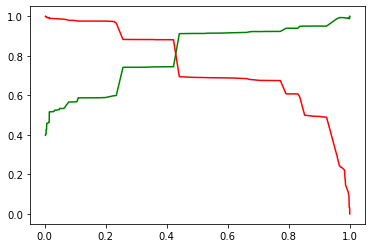

In [160]:
# PLOTTING PRECISION_RECALL CURVE

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# STEP-12 : `PREDICTION & EVALUATION ON TEST-SET`

In [161]:
# DETERMINING FIRST FIVE ROWS OF TEST SET

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
3271,0,4.0,157.0,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1490,0,5.0,1513.0,5.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7936,0,2.0,74.0,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4216,0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3830,0,8.0,164.0,8.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [162]:
# AGAIN FOLLOWING SAME STEP OF RESCALING
# STEP-2: NUMERICAL VARIABLES

varList

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [163]:
# STEP-3: TRANSFORM ON DATA

X_test[varList] = scaler.transform(X_test[varList])
X_test = X_test[col_supported]
X_test.head()

,Do Not Email,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Others Activity,Last Activity_Unsubscribed,Specialization_Others,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
1490,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7936,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
4216,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3830,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [164]:
# ADDING CONSTANT

X_test_sm = sm.add_constant(X_test)

In [165]:
# DROPPING ALL THE VARIABLES THAT WE HAVE DROPPED FROM TRAIN MODEL

X_test_sm.drop(['What is your current occupation_Unemployed','Tags_invalid number'],axis=1, inplace=True)

In [166]:
# MAKING PREDICTION

y_test_pred = logmodel_4.predict(X_test_sm)
y_test_pred[:10]

3271    0.234675
1490    0.422134
7936    0.234675
4216    0.999567
3830    0.422134
1800    0.422134
6507    0.069084
4821    0.014777
4223    0.972628
4714    0.234675
dtype: float64

In [167]:
# CONVERTING y_test_pred TO A DATAFRAME WHICH IS AN ARRAY
y_pred_1 = pd.DataFrame(y_test_pred)

# LET's SEE HEAD OF Y_PRED_1
y_pred_1.head()

,0
3271,0.234675
1490,0.422134
7936,0.234675
4216,0.999567
3830,0.422134


In [168]:
# CONVERTING y_test TO DATAFRAME
y_test_df = pd.DataFrame(y_test)

In [169]:
# PUTTING 'ProspectID' TO INDEX
y_test_df['Prospect ID'] = y_test_df.index

In [170]:
# REMOVING INDEX FOR BOTH DATAFRAMES TO APPEND THEM SIDE BY SIDE
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [171]:
# APPENDING y_test_df AND y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [172]:
# LET's SEE HEAD OF Y_PRED_FINAL
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.234675
1,1,1490,0.422134
2,0,7936,0.234675
3,1,4216,0.999567
4,0,3830,0.422134


In [173]:
# RENAMING THE COLUMN 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [174]:
# LET's SEE HEAD OF Y_PRED_FINAL
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,0,3271,0.234675
1,1,1490,0.422134
2,0,7936,0.234675
3,1,4216,0.999567
4,0,3830,0.422134


In [175]:
# CREATING NEW COLUMN 'FINAL_PREDICTED' WITH 1 IF CONVERTED_PROB > 0.42 ELSE 0

y_pred_final['Final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [176]:
# CREATING NEW COLUMN 'LEAD SCORE' WHICH DECIDES WHEATHER THE LEAD IS 'HOT' OR LEAD IS 'COLD'

y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x : round(x*100))

In [177]:
# LET's SEE HEAD OF Y_PRED_FINAL
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,Final_predicted,Lead_Score
0,0,3271,0.234675,0,23
1,1,1490,0.422134,1,42
2,0,7936,0.234675,0,23
3,1,4216,0.999567,1,100
4,0,3830,0.422134,1,42


In [178]:
# LET's CHECK OVERALL ACCURACY SCORE OF TEST-SET

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_predicted)

0.8255600440690415

In [179]:
# CONFUSION MATRICE OF TEST SET

confusion_metrice2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_predicted )
confusion_metrice2

array([[1396,  338],
       [ 137,  852]], dtype=int64)

In [180]:
TP = confusion_metrice2[1,1] # true positive 
TN = confusion_metrice2[0,0] # true negatives
FP = confusion_metrice2[0,1] # false positives
FN = confusion_metrice2[1,0] # false negatives

In [181]:
# LET's CALCULATE SENSITIVITY OF OUR REGRESSION MODEL FOR TEST-SET

sensitivity_test = TP / float(TP+FN)
sensitivity_test

0.8614762386248737

In [182]:
# LET's CALCULATE SPECIFICITY OF OUR REGRESSION MODEL FOR TEST-SET

specificity_test = TN / float(TN+FP)
specificity_test

0.8050749711649365

In [183]:
# CALCULATE PRECISION SCORE OF TEST SET

precision_score(y_true=y_pred_final.Converted, y_pred=y_pred_final.Final_predicted)

0.7159663865546219

In [184]:
# CALCULATE RECALL SCORE OF TEST SET

recall_score(y_true=y_pred_final.Converted, y_pred=y_pred_final.Final_predicted)

0.8614762386248737

### `PRECISION & RECALL TRADEOFF OF TEST-SET`

In [185]:
# GETTING Y-CONVERTED & Y-PREDICTED

y_pred_final.Converted, y_pred_final.Final_predicted

(0       0
 1       1
 2       0
 3       1
 4       0
        ..
 2718    0
 2719    0
 2720    1
 2721    0
 2722    0
 Name: Converted, Length: 2723, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 2718    1
 2719    0
 2720    1
 2721    1
 2722    1
 Name: Final_predicted, Length: 2723, dtype: int64)

In [186]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

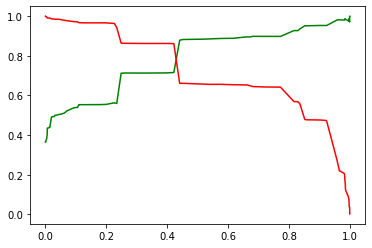

In [187]:
# PLOTTING PRECISION_RECALL CURVE

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- **`THE PRECISION RECALL CURVE FOR BOTH TRAIN-SET AND TEST-SET IS EXCATLY SAME.`**

### `CHECKING FOR THE CONVERSION RATE`

In [188]:
# CHECKING IF 80% CASES ARE CORRECTLY PREDICTED BASED ON THE CONVERTED COLUMN

checking_conversion = y_pred_final.loc[y_pred_final['Converted']==1, ['Converted', 'Final_predicted']]
checking_conversion['Final_predicted'].value_counts()

1    852
0    137
Name: Final_predicted, dtype: int64

In [189]:
# CHECKING THE PERCENTAGE OF FINAL PREDICTED CONVERSION ON TEST DATA

(852/float(852+137))*100

86.14762386248736

### HENCE WE CAN SEE THAT THE FINAL PREDICTION OF CONVERSION HAVE A TARGET RATE OF 86%, WHICH IS MORE THAN EXPECTED(80%).

### `COMPARING ACCURACY, SENSITIVITY, SPECIFICITY, PRECISION & RECALL SCORE OF TRAIN & TEST SET`

In [190]:
# COMPARING THE ACCURACY SCORE OF TRAIN & TEST SET

print("Train-set accuracy score :" , metrics.accuracy_score(y_true=y_train_pred_final.Converted, y_pred=y_train_pred_final.Predicted))
print("Test-set accuracy score  :" , metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_predicted))      

Train-set accuracy score : 0.8379782711384034
Test-set accuracy score  : 0.8255600440690415


In [191]:
# COMPARING THE SENSITIVITY SCORE OF TRAIN & TEST SET

print("Train-set sensitivity :" , sensitivity_train)
print("Test-set sensitivity  :" , sensitivity_test)      

Train-set sensitivity : 0.8810302534750614
Test-set sensitivity  : 0.8614762386248737


In [192]:
# COMPARING THE SPECIFICITY SCORE OF TRAIN & TEST SET

print("Train-set specificity :" , specificity_train)
print("Test-set specificity  :" , specificity_test)      

Train-set specificity : 0.81101152368758
Test-set specificity  : 0.8050749711649365


In [193]:
# COMPARING THE PRECISION SCORE OF TRAIN & TEST SET

print("Train-set precision score :" , precision_score(y_true=y_train_pred_final.Converted, y_pred=y_train_pred_final.Predicted))
print("Test-set precision score  :" , precision_score(y_true=y_pred_final.Converted, y_pred=y_pred_final.Final_predicted))      

Train-set precision score : 0.7449014863463532
Test-set precision score  : 0.7159663865546219


In [194]:
# COMPARING THE RECALL SCORE OF TRAIN & TEST SET

print("Train-set recall score :" , recall_score(y_true=y_train_pred_final.Converted, y_pred=y_train_pred_final.Predicted))
print("Test-set recall score  :" , recall_score(y_true=y_pred_final.Converted, y_pred=y_pred_final.Final_predicted))      

Train-set recall score : 0.8810302534750614
Test-set recall score  : 0.8614762386248737


### THE MODEL SEEMS TO PREDICT THE CONVERSION RATE VERY WELL AND WE SHOULD BE ABLE TO GIVE THIS MODEL TO THE CEO FOR MAKING GOOD CALLS.

# `CONCLUSION`:-
- **THE VARIABLES THAT MATTERS MOST ARE :-**
1. TOTAL TIME THEY SPENT ON WEBSITE.
2. TOTAL NUMBER OF VISITS.
3. WHEN THE LEAD SOURCE WAS :-
    - `GOOGLE`
    - `DIRECT TRAFFIC`
    - `REFERENCE`
    - `WELINGAK WEBSITE`
4. WHEATHER THERE CURRENT OCCUPATION IS WORKING PROFESSIONAL OR IF THEY ARE UNEMPLOYED.
5. WHEN THE LEAD ORIGIN IS LEAD ADD FORM.
6. WHEN LAST ACTIVITY WAS :-
    - `SMS SENT`
    - `EMAIL OPENED`
7. WHEN TAGS WAS :-
    - `CLOSED BY HORIZZON`
    - `LOST TO EINS`